In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import soundfile as sf
import scipy.fftpack as fft
from scipy.signal import medfilt

In [3]:
y, sr = librosa.load("frog_ambient.wav", sr=None)

In [6]:
S_full, phase = librosa.magphase(librosa.stft(y)) #mag: magnitued, phase: time
# stft changes y to frequency domain

noise_power = np.mean(S_full[:int(sr*0.1)], axis=1) # we pass magnitude data, but we only use couple of seconds
# this is a base noise level

mask = S_full > noise_power[:, None]

mask = mask.astype(float)

# we smoothen the mas
mask = medfilt(mask, kernel_size=(1,5))

S_clean = S_full * mask

# we perform inverse of stft to make it a wav a again

y_clean = librosa.istft(S_clean * phase)

In [7]:
sf.write('clean.wav', y_clean, sr)

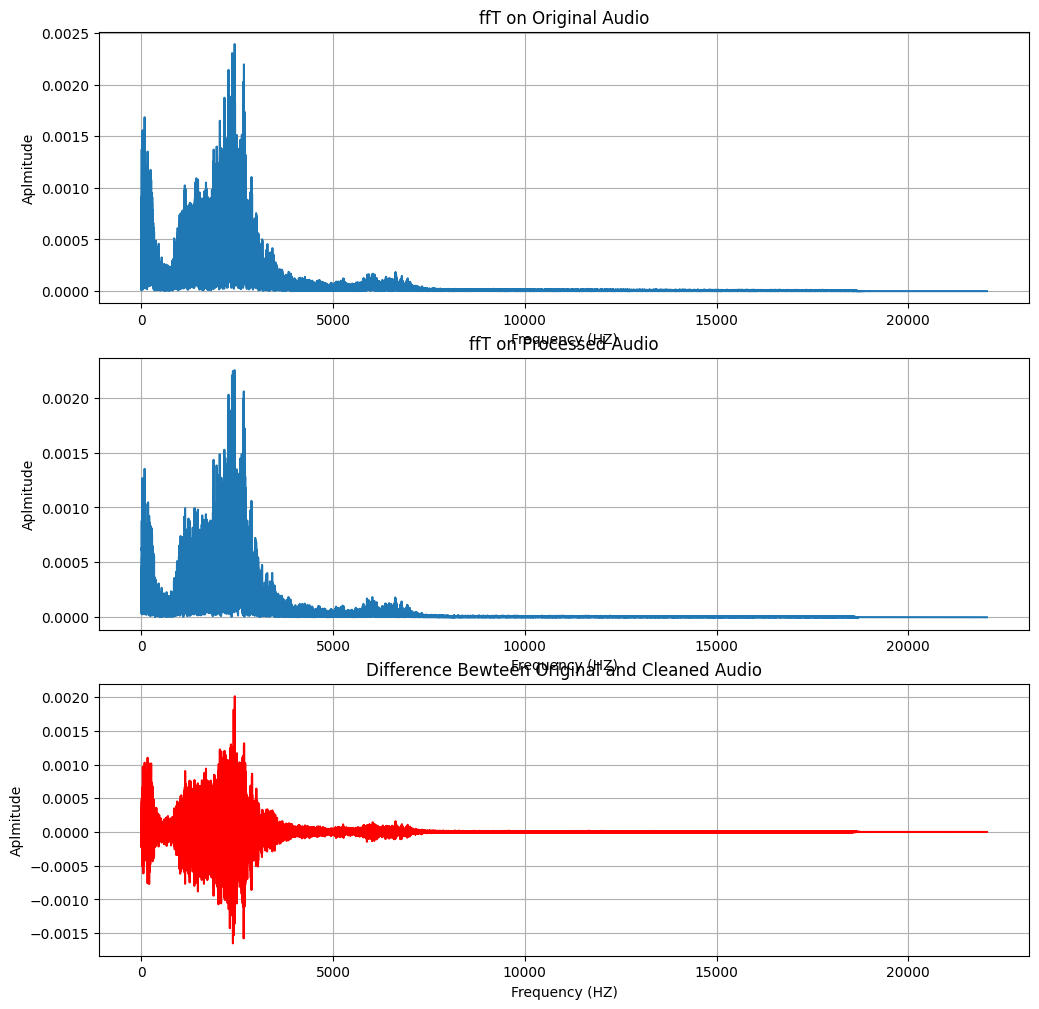

In [ ]:
n = len(y)
yf = fft.fft(y)
yf_clean = fft.fft(y_clean)
xf = np.linspace(0.0, sr/2.0, n //2)

difference = np.abs(yf[:n//2]) - np.abs(yf_clean[:n//2])
plt.figure(figsize=(12,9))
plt.subplot(3,1,1)
plt.plot(xf, 2.0 / n * np.abs(yf[:n//2]))
plt.title('ffT on Original Audio')
plt.xlabel(f"Frequency (HZ)")
plt.ylabel("Aplmitude")
plt.grid()

plt.subplot(3,1,2)
plt.plot(xf, 2.0 / n * np.abs(yf_clean[:n//2]))
plt.title('ffT on Processed Audio')
plt.xlabel(f"Frequency (HZ)")
plt.ylabel("Aplmitude")
plt.grid()

plt.subplot(3,1,3)
plt.plot(xf, 2.0 / n * difference, color='red')
plt.title('Difference Bewteen Original and Cleaned Audio')
plt.xlabel(f"Frequency (HZ)")
plt.ylabel("Aplmitude")
plt.grid()